### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set_style('whitegrid')

In [4]:
# Define the variables for the Percent to target based on historical results
avg = 1
std_dev = .1
num_reps = 500
num_simulations = 1000

In [5]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

In [6]:
pct_to_target[0:10]

array([0.99, 1.01, 0.93, 0.99, 0.87, 1.01, 1.12, 1.17, 1.07, 1.01])

In [7]:
# Another example for the sales target distribution
sales_target_values = [.02,.04,-.02,.06,.07,-.04]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [8]:
sales_target[0:10]

array([ 0.04,  0.04,  0.04,  0.04,  0.02,  0.02, -0.02,  0.02,  0.02,
        0.02])

In [9]:
# Show how to create the dataframe
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})
df.head()

,Pct_To_Target,Sales_Target
0,0.99,0.04
1,1.01,0.04
2,0.93,0.04
3,0.99,0.04
4,0.87,0.02


<AxesSubplot:title={'center':'Historical % to Target Distribution'}, ylabel='Frequency'>

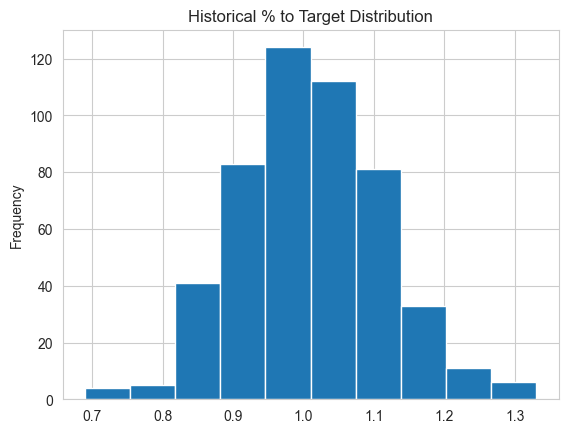

In [10]:
# Simple histogram to confirm distribution looks as expected
df['Pct_To_Target'].plot(kind='hist', title='Historical % to Target Distribution')

<AxesSubplot:title={'center':'Historical Sales Target Distribution'}, ylabel='Frequency'>

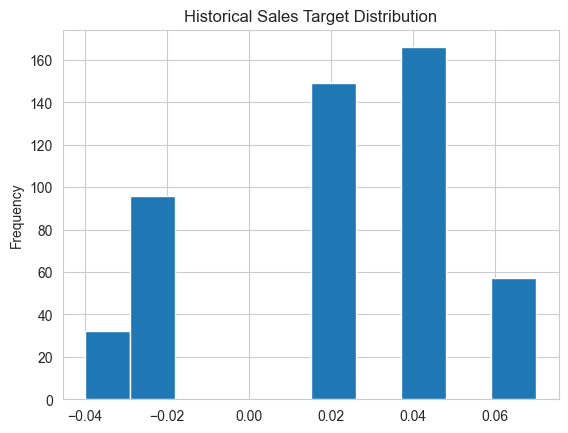

In [11]:
# Look at the sales target distribution
df['Sales_Target'].plot(kind='hist', title='Historical Sales Target Distribution')

In [12]:
# Back into the actual sales amount
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [13]:
def calc_commission_rate(x):
    """ Return the commission rate based on the table:
    0-90% = 2%
    91-99% = 3%
    >= 100 = 4%
    """
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [14]:
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)

In [15]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate
0,0.99,0.04,0.0396,0.03
1,1.01,0.04,0.0404,0.04
2,0.93,0.04,0.0372,0.03
3,0.99,0.04,0.0396,0.03
4,0.87,0.02,0.0174,0.02


In [16]:
# Calculate the commissions
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

In [17]:
df.head()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
0,0.99,0.04,0.0396,0.03,0.001188
1,1.01,0.04,0.0404,0.04,0.001616
2,0.93,0.04,0.0372,0.03,0.001116
3,0.99,0.04,0.0396,0.03,0.001188
4,0.87,0.02,0.0174,0.02,0.000348


In [18]:
print(df['Sales'].sum(), df['Commission_Amount'].sum(), df['Sales_Target'].sum())

10.176099999999998 0.355221 10.05


In [19]:
df.describe()

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.009060,0.020100,0.020352,0.033880,0.000710
std,0.101071,0.029873,0.030229,0.007311,0.001091
min,0.690000,-0.040000,-0.050800,0.020000,-0.002032
25%,0.940000,-0.020000,-0.016850,0.030000,-0.000337
50%,1.000000,0.020000,0.022200,0.040000,0.000832
75%,1.080000,0.040000,0.041200,0.040000,0.001632
max,1.330000,0.070000,0.086800,0.040000,0.003472


### Show Full Example of the simulation

In [20]:
# Define a list to keep all the results from each simulation that we want to analyze
all_stats = []

# Loop through many simulations
for i in range(num_simulations):
    
    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    
    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    
    # Back into the sales number using the percent to target rate
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    
    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']
    
    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Sales'].sum().round(0), 
                      df['Commission_Amount'].sum().round(0), 
                      df['Sales_Target'].sum().round(0)])

In [21]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales', 'Commission_Amount', 'Sales_Target'])

In [22]:
results_df.describe().round(0).style.format('{:,}')

,Sales,Commission_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,11.0,0.0,11.0
std,1.0,0.0,1.0
min,9.0,0.0,8.0
25%,10.0,0.0,10.0
50%,11.0,0.0,11.0
75%,11.0,0.0,11.0
max,13.0,0.0,13.0


<AxesSubplot:title={'center':'Total Commission Amount'}, ylabel='Frequency'>

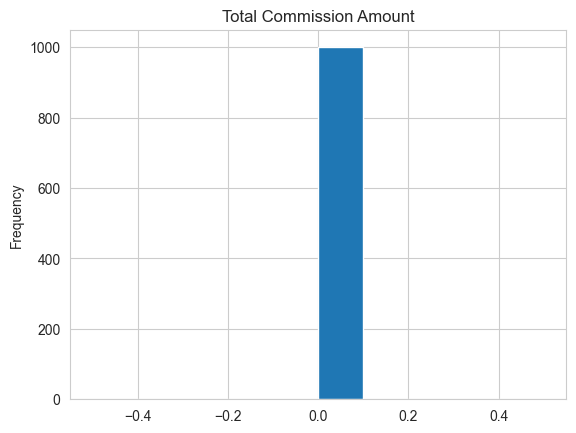

In [23]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount")

<AxesSubplot:ylabel='Frequency'>

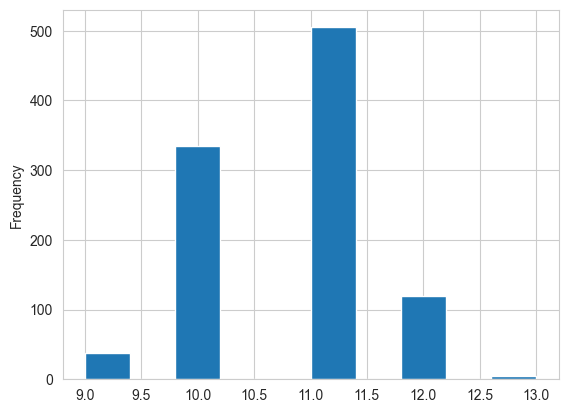

In [24]:
results_df['Sales'].plot(kind='hist')